# Jupyter: Beyond Normal Python

There are many options for development environments for Python, and I'm often asked which one I use in my own work.
My answer sometimes surprises people: my preferred environment is [IPython](http://ipython.org/) plus a text editor (in my case, Emacs or VSCode depending on my mood).
Jupyter got its start as the IPython shell, which was created in 2001 by Fernando Perez as an enhanced Python interpreter and has since grown into a project aiming to provide, in Perez's words, "Tools for the entire life cycle of research computing."
If Python is the engine of our data science task, you might think of Jupyter as the interactive control panel.

As well as being a useful interactive interface to Python, Jupyter also provides a number of useful syntactic additions to the language; we'll cover the most useful of these additions here.
Perhaps the most familiar interface provided by the Jupyter project is the Jupyter Notebook, a browser-based environment that is useful for development, collaboration, sharing, and even publication of data science results.
As an example of the usefulness of the notebook format, look no further than the page you are reading: the entire manuscript for this book was composed as a set of Jupyter notebooks.

This part of the book will start by stepping through some of the Jupyter and IPython features that are useful to the practice of data science, focusing especially on the syntax they offer beyond the standard features of Python.
Next, we will go into a bit more depth on some of the more useful *magic commands* that can speed up common tasks in creating and using data science code.
Finally, we will touch on some of the features of the notebook that make it useful for understanding data and sharing results.

In [3]:
input()

3


'3'

In [5]:
name = input("What is your name?\n")
if name == "Ben":
  print("You are not allowed \nBen \n!! get out !!")
  exit()
else:
  print("Hello  " + name + "  \nThank you so much for coming in today. \n\n\n")


What is your name?
Mica
Hello  Mica  
Thank you so much for coming in today. 





In [2]:
name = input("What is your name?\n")
if name == "Ben":
  evil_status = input("Are you Evil?\n")
  if evil_status == "Yes":
    print("You are not allowed \nBen \n!! get out !!")
    exit()
  else:
    print("Oh, so you are one of those good Bens,Come on in!!! ")
else:
  print("Hello  " + name + "  \nThank you so much for coming in today. \n\n\n")


What is your name?
Ben
Are you Evil?
Yes
You are not allowed 
Ben 
!! get out !!


In [8]:
menue = "Black Coffee, Espreseo, Latte, Cappucino, Frapucino"
order = input("What would you like to order from our menue today, Here is what we are serving\n" + menue + "\n")
quantity = input("How many coffee would you like?\n")
if order == "Black Coffee":
  price = 3
if order == "Espreseo":
  price = 5
if order == "Latte":
  price = 4
if order == "Cappucino":
  price = 7
if order == "Frapucino":
  price = 12
print("The Price is =\n", price)

What would you like to order from our menue today, Here is what we are serving
Black Coffee, Espreseo, Latte, Cappucino, Frapucino
Espreseo
How many coffee would you like?

The Price is =
 5


In [14]:
menue = "Black Coffee, Espreseo, Latte, Cappucino, Frapucino"
order = input("What would you like to order from our menue today, Here is what we are serving\n" + menue + "\n")
quantity = input("How many coffee would you like?\n")
if order == "Black Coffee":
  price = 3
elif order == "Espreseo":
  price = 5
elif order == "Latte":
  price = 4
elif order == "Cappucino":
  price = 7
elif order == "Frapucino":
  price = 12
print("The Price is =\n", price)

What would you like to order from our menue today, Here is what we are serving
Black Coffee, Espreseo, Latte, Cappucino, Frapucino
Black Coffee
How many coffee would you like?

The Price is =
 3


In [17]:
menue = "Black Coffee, Espreseo, Latte, Cappucino, Frapucino"
order = input("What would you like to order from our menue today, Here is what we are serving\n" + menue + "\n")
quantity = input("How many coffee would you like?\n")
if order == "Black Coffee":
  price = 3
elif order == "Espreseo":
  price = 5
elif order == "Latte":
  price = 4
elif order == "Cappucino":
  price = 7
elif order == "Frapucino":
  price = 12
#print("The Price is =\n", price)
else:
  print("Sorry, we do not have this here\n")

What would you like to order from our menue today, Here is what we are serving
Black Coffee, Espreseo, Latte, Cappucino, Frapucino
green tea
How many coffee would you like?

Sorry, we do not have this here



In [18]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [20]:
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 3, 1)
datetime_index = pd.date_range(start=start_date, end=end_date, freq='10min')

In [21]:
np.random.seed(42)
base_energy = []
for dt in datetime_index:
    hour = dt.hour
    if 6 <= hour <= 18:
        energy = np.random.normal(loc=300, scale=30)
    else:
        energy = np.random.normal(loc=50, scale=15)
    base_energy.append(energy)

energy_production = pd.Series(base_energy)

In [23]:
energy_production.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8497 entries, 0 to 8496
Series name: None
Non-Null Count  Dtype  
--------------  -----  
8497 non-null   float64
dtypes: float64(1)
memory usage: 66.5 KB


In [25]:
num_missing = int(0.1 * len(energy_production))
missing_indices = np.random.choice(len(energy_production), num_missing, replace=False)
energy_production.iloc[missing_indices] = np.nan

mock_energy_data_with_missing = pd.DataFrame({
    'Datetime': datetime_index,
    'Energy_Production': energy_production
})

In [27]:
mock_energy_data_with_missing.head()

,Datetime,Energy_Production
0,2023-01-01 00:00:00,57.450712
1,2023-01-01 00:10:00,47.926035
2,2023-01-01 00:20:00,NaN
3,2023-01-01 00:30:00,72.845448
4,2023-01-01 00:40:00,46.487699


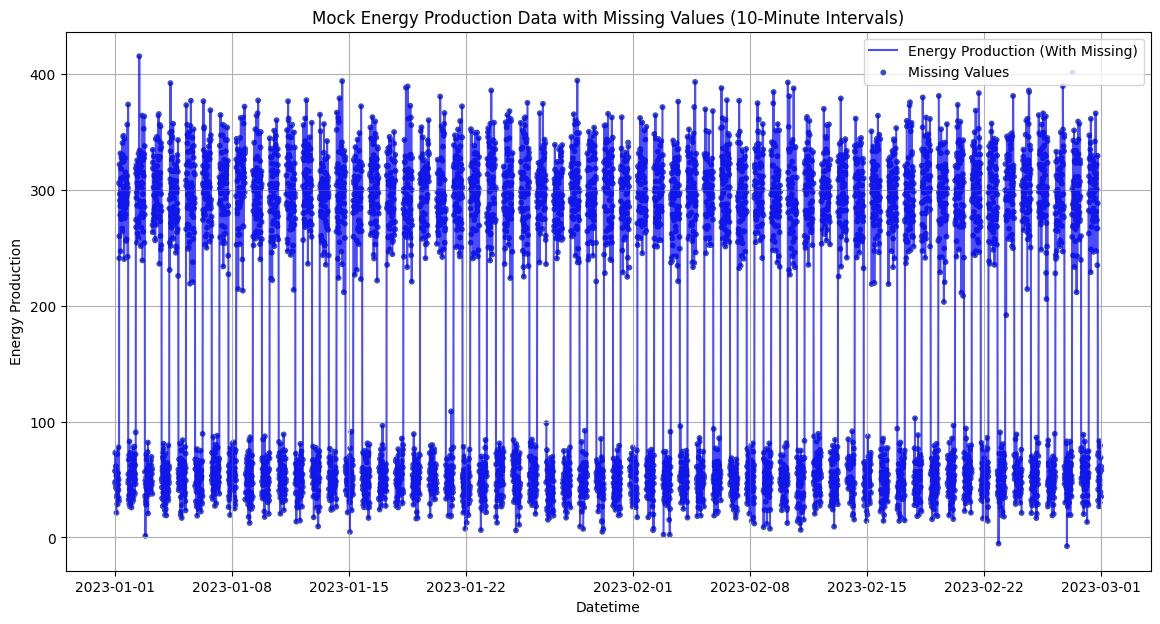

In [26]:
data_with_index = mock_energy_data_with_missing.reset_index()
data_with_index['Time_Index'] = np.arange(len(data_with_index))  # Add time-based index

plt.figure(figsize=(14, 7))
plt.plot(mock_energy_data_with_missing['Datetime'], mock_energy_data_with_missing['Energy_Production'],
         label='Energy Production (With Missing)', color='blue', alpha=0.7)
plt.scatter(mock_energy_data_with_missing['Datetime'], mock_energy_data_with_missing['Energy_Production'],
            c=mock_energy_data_with_missing['Energy_Production'].isna(), cmap='coolwarm',
            label='Missing Values', s=10)  # Reduced size of the markers
plt.title('Mock Energy Production Data with Missing Values (10-Minute Intervals)')
plt.xlabel('Datetime')
plt.ylabel('Energy Production')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, binom, poisson, expon

# Data setup
x = np.linspace(-10, 10, 1000)

In [29]:
x

array([-10.        ,  -9.97997998,  -9.95995996,  -9.93993994,
        -9.91991992,  -9.8998999 ,  -9.87987988,  -9.85985986,
        -9.83983984,  -9.81981982,  -9.7997998 ,  -9.77977978,
        -9.75975976,  -9.73973974,  -9.71971972,  -9.6996997 ,
        -9.67967968,  -9.65965966,  -9.63963964,  -9.61961962,
        -9.5995996 ,  -9.57957958,  -9.55955956,  -9.53953954,
        -9.51951952,  -9.4994995 ,  -9.47947948,  -9.45945946,
        -9.43943944,  -9.41941942,  -9.3993994 ,  -9.37937938,
        -9.35935936,  -9.33933934,  -9.31931932,  -9.2992993 ,
        -9.27927928,  -9.25925926,  -9.23923924,  -9.21921922,
        -9.1991992 ,  -9.17917918,  -9.15915916,  -9.13913914,
        -9.11911912,  -9.0990991 ,  -9.07907908,  -9.05905906,
        -9.03903904,  -9.01901902,  -8.998999  ,  -8.97897898,
        -8.95895896,  -8.93893894,  -8.91891892,  -8.8988989 ,
        -8.87887888,  -8.85885886,  -8.83883884,  -8.81881882,
        -8.7987988 ,  -8.77877878,  -8.75875876,  -8.73

In [34]:
x

array([-10.        ,  -9.97997998,  -9.95995996,  -9.93993994,
        -9.91991992,  -9.8998999 ,  -9.87987988,  -9.85985986,
        -9.83983984,  -9.81981982,  -9.7997998 ,  -9.77977978,
        -9.75975976,  -9.73973974,  -9.71971972,  -9.6996997 ,
        -9.67967968,  -9.65965966,  -9.63963964,  -9.61961962,
        -9.5995996 ,  -9.57957958,  -9.55955956,  -9.53953954,
        -9.51951952,  -9.4994995 ,  -9.47947948,  -9.45945946,
        -9.43943944,  -9.41941942,  -9.3993994 ,  -9.37937938,
        -9.35935936,  -9.33933934,  -9.31931932,  -9.2992993 ,
        -9.27927928,  -9.25925926,  -9.23923924,  -9.21921922,
        -9.1991992 ,  -9.17917918,  -9.15915916,  -9.13913914,
        -9.11911912,  -9.0990991 ,  -9.07907908,  -9.05905906,
        -9.03903904,  -9.01901902,  -8.998999  ,  -8.97897898,
        -8.95895896,  -8.93893894,  -8.91891892,  -8.8988989 ,
        -8.87887888,  -8.85885886,  -8.83883884,  -8.81881882,
        -8.7987988 ,  -8.77877878,  -8.75875876,  -8.73

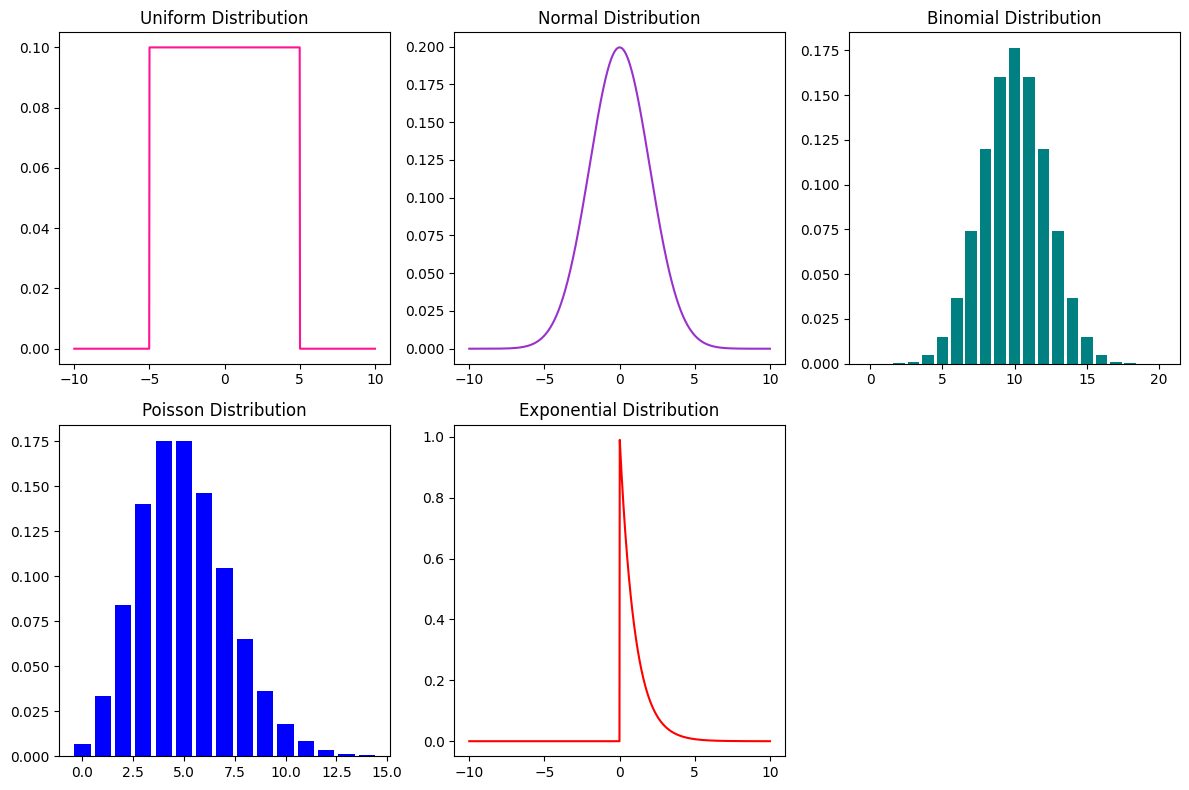

In [39]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.title("Uniform Distribution")
data_uniform = uniform.pdf(x, loc=-5, scale=10)  # Uniform from -5 to 5
plt.plot(x, data_uniform,color='deeppink')
plt.subplot(2, 3, 2)
plt.title("Normal Distribution")
data_normal = norm.pdf(x, loc=0, scale=2)  # Mean = 0, SD = 2
plt.plot(x, data_normal,color='darkorchid')
plt.subplot(2, 3, 3)
plt.title("Binomial Distribution")
n, p = 20, 0.5  # 20 trials, 50% success probability
data_binom = binom.pmf(range(21), n, p)
plt.bar(range(21), data_binom,color='teal')
plt.subplot(2, 3, 4)
plt.title("Poisson Distribution")
mu = 5
data_poisson = poisson.pmf(range(15), mu)
plt.bar(range(15), data_poisson,color='blue')
plt.subplot(2, 3, 5)
plt.title("Exponential Distribution")
data_expon = expon.pdf(x, scale=1)  # Lambda = 1
plt.plot(x, data_expon,color='red')

plt.tight_layout()
plt.show()

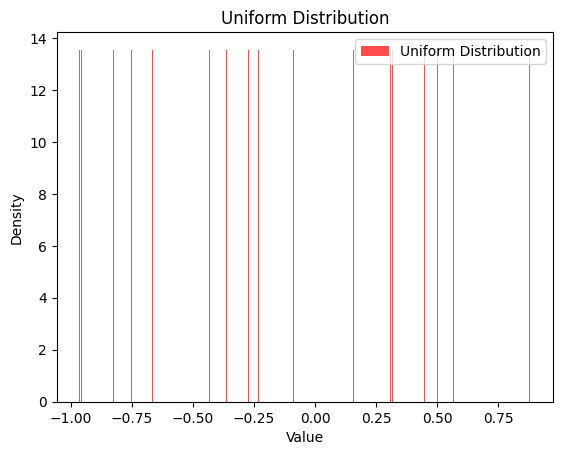

In [49]:
from pickle import TRUE
data_uniform = np.random.uniform(low=-1, high=1, size=20)

# Visualize
plt.hist(data_uniform, bins=500, density=True, alpha=0.7, color='red', label='Uniform Distribution')
plt.title("Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

In [44]:
data_uniform

array([0.41958938, 0.60690265, 0.1560592 , ..., 0.60688983, 0.00659838,
       0.55607207])

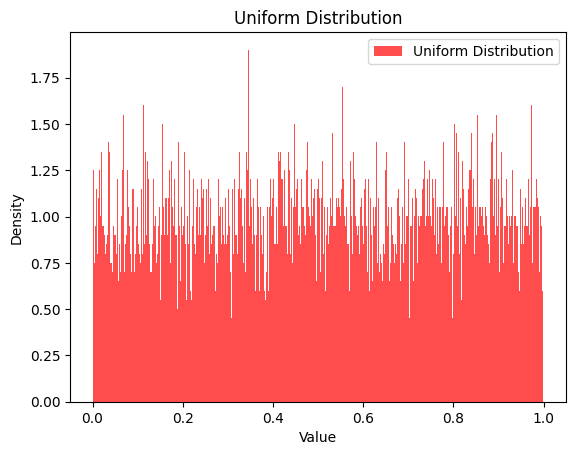

In [43]:
data_uniform = np.random.uniform(low=0, high=1, size=10000)

# Visualize
plt.hist(data_uniform, bins=500, density=True, alpha=0.7, color='red', label='Uniform Distribution')
plt.title("Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

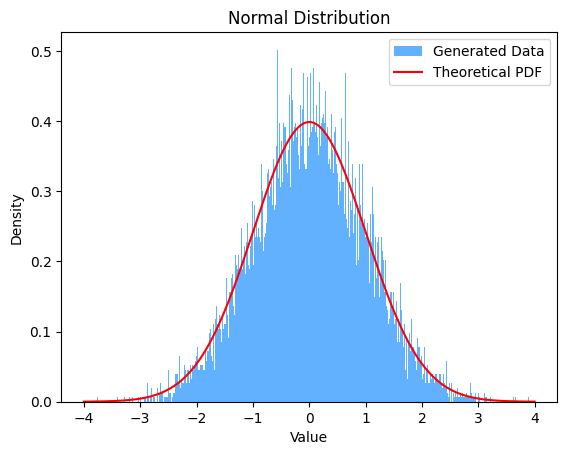

In [53]:
from scipy.stats import norm

# Generate data
data_normal = np.random.normal(loc=0, scale=1, size=10000)

# Visualize
x = np.linspace(-4, 4, 1000)
plt.hist(data_normal, bins=500, density=True, color='dodgerblue', alpha=0.7, label="Generated Data")
plt.plot(x, norm.pdf(x, loc=0, scale=1), 'r-', label="Theoretical PDF")
plt.title("Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

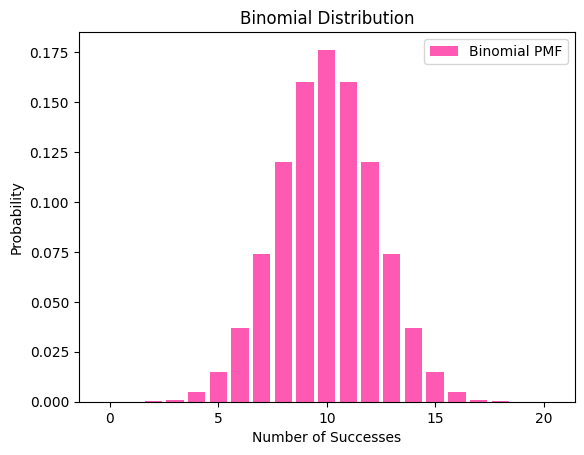

In [54]:
from scipy.stats import binom

# Parameters
n, p = 20, 0.5

# Generate data
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)

# Visualize
plt.bar(x, pmf, alpha=0.7,color='deeppink', label="Binomial PMF")
plt.title("Binomial Distribution")
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.legend()
plt.show()

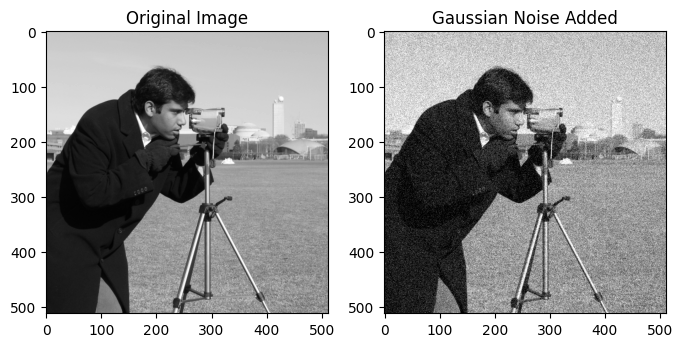

In [55]:
from skimage.util import random_noise
from skimage import data, io

image = data.camera()
noisy_image = random_noise(image, mode='gaussian', var=0.01)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Gaussian Noise Added")
plt.imshow(noisy_image, cmap='gray')
plt.show()

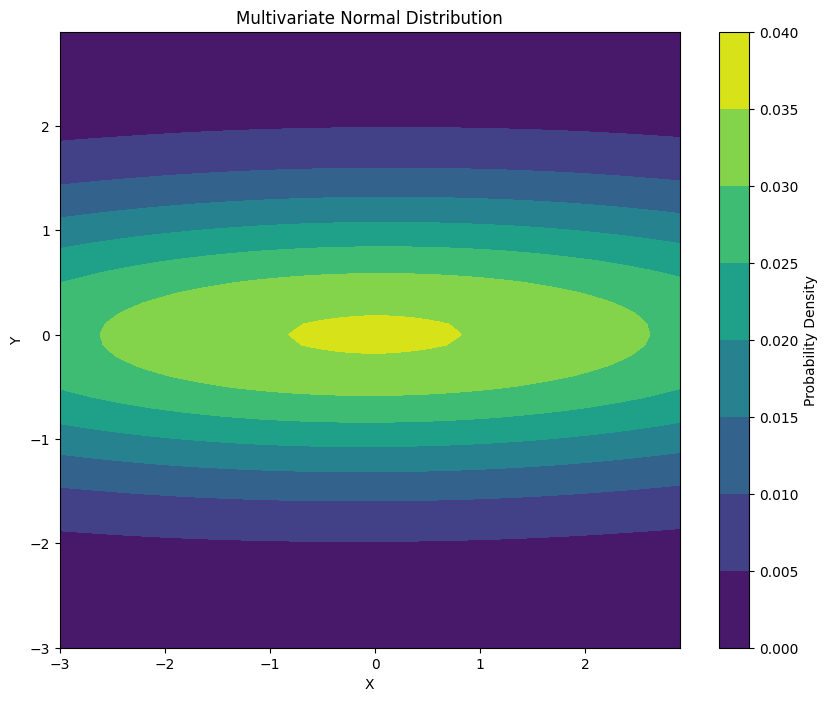

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters
mean = [0, 0]  # Mean of X and Y
cov = [[20, 0.1], [0.1, 1]]  # Covariance matrix (positive correlation)

# Generate a grid
x, y = np.mgrid[-3:3:.1, -3:3:.1]
pos = np.dstack((x, y))

# Multivariate normal distribution
rv = multivariate_normal(mean, cov)
pdf = rv.pdf(pos)

# Plot
plt.figure(figsize=(10, 8))
plt.contourf(x, y, pdf, cmap="viridis")
plt.colorbar(label="Probability Density")
plt.title("Multivariate Normal Distribution")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

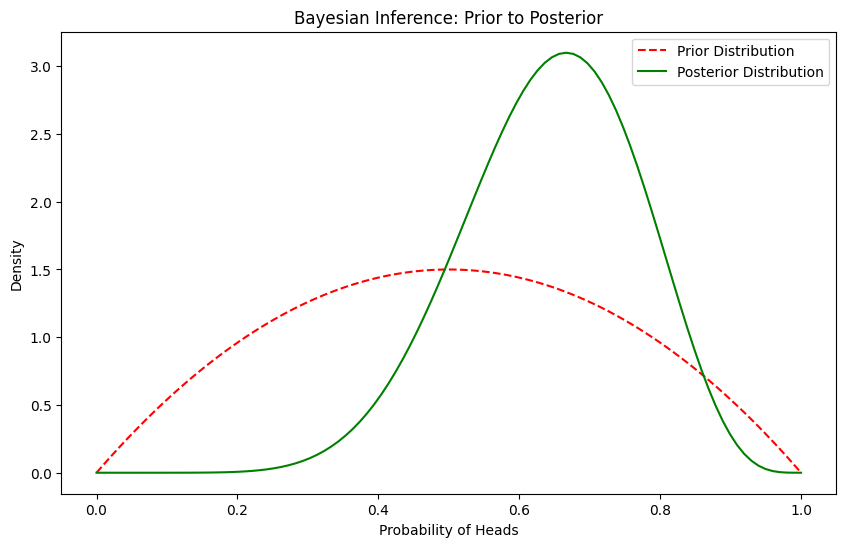

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Prior parameters for Beta distribution (prior belief)
alpha_prior, beta_prior = 2, 2

# Observed data: 7 heads in 10 flips
observed_heads = 7
observed_tails = 3

# Posterior parameters
alpha_post = alpha_prior + observed_heads
beta_post = beta_prior + observed_tails

# Plot prior and posterior
x = np.linspace(0, 1, 100)
prior = beta.pdf(x, alpha_prior, beta_prior)
posterior = beta.pdf(x, alpha_post, beta_post)

plt.figure(figsize=(10, 6))
plt.plot(x, prior, label="Prior Distribution", color='red', linestyle="--")
plt.plot(x, posterior,color='green', label="Posterior Distribution")
plt.title("Bayesian Inference: Prior to Posterior")
plt.xlabel("Probability of Heads")
plt.ylabel("Density")
plt.legend()
plt.show()